# Seminar 4

In [1]:
import numpy as np
import sympy as sy
from scipy import optimize
from matplotlib import pyplot as plt

from mpl_toolkits.axes_grid.axislines import SubplotZero

In today's seminar we will take a look at data fitting as well as some usefull scipy and sympy functions. You can find a lot of information on the topic on the following pages:

- https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.curve_fit.html
- http://blog.mmast.net/least-squares-fitting-numpy-scipy
- http://docs.sympy.org/latest/tutorial/intro.html#what-is-symbolic-computatio
- https://en.wikipedia.org/wiki/Levenberg–Marquardt_algorithm

### calculus with sympy

In [2]:
sy.init_session(quiet = False)

IPython console for SymPy 1.0 (Python 2.7.11-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


### Integration

In [3]:
a = sy.Integral(x, (x, 1, 2))
l = latex(a)
print l

\int_{1}^{2} x\, dx


## $\int_{1}^{2} x  dx = \frac{3}{2}$ 

Recap: what is a function?

In [4]:
def guess_a_number(a):
    if a > 5:
        b = "that is a very large number"
    else:
        b = "this is not a large number"
    return b

In [5]:
print guess_a_number(10)

that is a very large number


In [6]:
print guess_a_number(1)

this is not a large number


Example: We can use functions to spawn a set of parameters. The following function prepares the plot environment.  

In [7]:
def init_plot(Xmax = 3, Ymax = 3):
    %matplotlib inline 
    fig = plt.figure(1)
    ax = SubplotZero(fig, 111)
    fig.add_subplot(ax)

    ax.axhline(linewidth=1.7, color="black")
    ax.axvline(linewidth=1.7, color="black")

    plt.xticks([])
    plt.yticks([])
    
    ax.set_xlim([-0.5,3])
    ax.set_ylim([-0.5,3])
    
    for direction in ["xzero", "yzero"]:
        ax.axis[direction].set_visible(True)

    for direction in ["left", "right", "bottom", "top"]:
        ax.axis[direction].set_visible(False)

    plt.arrow(Xmax, 0.0035, 0.1, 0, width=0.01, color="k", clip_on=False, head_width=0.12, head_length=0.06)
    plt.arrow(0.0035, Ymax, 0, 0.1, width=0.01, color="k", clip_on=False, head_width=0.06, head_length=0.12)
    return ax 

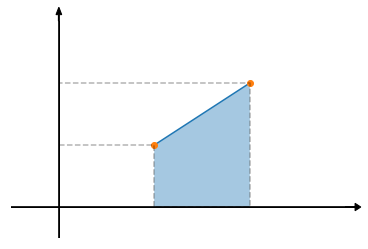

In [8]:
ax = init_plot()
ax.plot([1,2],[1,2], "-")
ax.plot([1,2],[1,2], "o")
ax.fill_between([1,2],[1,2],[0,0], alpha = 0.4)

ax.plot([0,1,1,2,2,0],[1,1,0,0,2,2], "--k", alpha = 0.3)

plt.show()

### Differentiation

In [9]:
a = sy.diff(x**2, x)
l = latex(a)
print l

2 x


## $\frac{dx}{dy} x^2 = 2x$ 

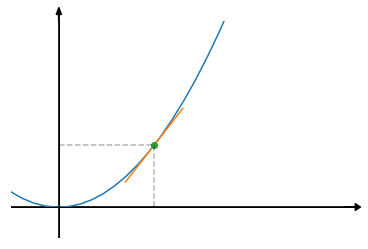

In [10]:
x = np.linspace(-0.5,3,30)
y = x**2.

xi = np.array([-0.3, 0.3])
ax = init_plot()
ax.plot(x,y, "-")
ax.plot(xi+1,np.arctan(xi)+(xi+1), "-")
ax.plot([1],[1], "o")

ax.plot([0,1,1],[1,1,0], "--k", alpha = 0.3)

plt.show()

## Fitting

In the simplest generall case we can numerically fit a set of data points ($x_i, y_i$) by comparing them to a set of functions $f$ spawned from a set of parameters $\beta$.

<h3 align="center"> $\hat{\beta} \equiv argmin_{\beta} \sum_{i=1}^m [y_i - f(x_{i,n}, \beta_n)]^2$ </h3> 

Following, we will try to understand the formulation above and try to create a simple fitting algorithm. First, we create a data set for x and y using the following example function $f(x) = b x^2$.

In [11]:
def X2(x,b):  ### python function
    y = b*x**2
    return y

In [12]:
x = np.linspace(-2.,+2,20) ### spawns a set of x-coordinates.

We can directly use the function from above to create a set of graphs with a range of parameters $\beta$ from zero to five.

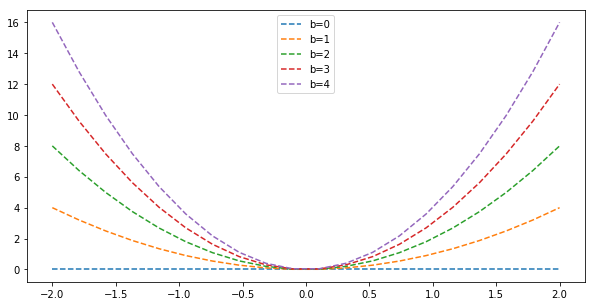

In [13]:
plt.figure(figsize = (10,5) )
for i in range(5):
    plt.plot(x,X2(x,i), "--", label = "b="+str(i))
plt.legend()
plt.show()

However, we would like to create an array with size (m,n) with the following shape: 

$Y = f(x_{m,n} \beta_n ) = f
 \begin{pmatrix}
  x_{1,1},\beta_1 & x_{1,2},\beta_2 & \cdots & x_{1,n},\beta_n \\
  x_{2,1},\beta_1 & x_{2,2},\beta_2 & \cdots & x_{2,n},\beta_n \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{m,1},\beta_1 & x_{m,2},\beta_2 & \cdots & x_{m,n},\beta_n
 \end{pmatrix}$

In [14]:
Y = []
b = range(10)
for i in b:
    Y.append(X2(x,i))
Y = np.asarray(Y)
print b

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Let's choose one $\beta == 2$, compute $y = f(x,\beta=2)$ and than try to find the coresponding line in Y.

In [15]:
y = X2(x,2)
print Y.T.shape, x.shape   ### .T transposes the array 

(20, 10) (20,)


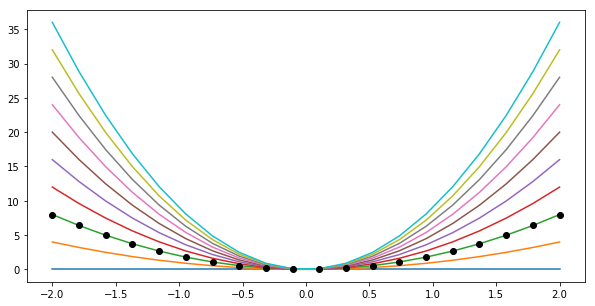

In [16]:
plt.figure(figsize = (10,5) )
plt.plot(x,Y.T, )
plt.plot(x,y, "ok")
plt.show()

We now compute the residual with:

$Res = Y-y = f
 \begin{pmatrix}
  x_{1,1},\beta_1 & x_{1,2},\beta_2 & \cdots & x_{1,n},\beta_n \\
  x_{2,1},\beta_1 & x_{2,2},\beta_2 & \cdots & x_{2,n},\beta_n \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{m,1},\beta_1 & x_{m,2},\beta_2 & \cdots & x_{m,n},\beta_n
 \end{pmatrix} 
 - 
 \begin{pmatrix} 
 y_{1}   \\
 y_{2}   \\
 \vdots  \\
 y_{m} 
 \end{pmatrix}$

In [17]:
Residual = np.abs(Y-y)

Plot the residual 

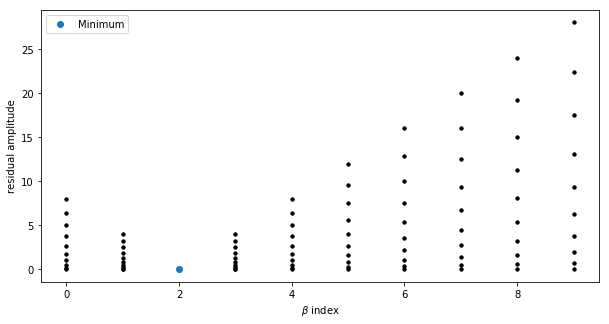

In [18]:
plt.figure(figsize = (10,5) )
plt.plot(Residual,".k")
plt.plot(np.argmin(Residual.std(1)), Residual.std(1).min(), "o", label = "Minimum")
plt.xlabel(r"$\beta$ index")
plt.ylabel("residual amplitude")
plt.legend()
plt.show()

To find the best fit we will now sum up the amplitudes for the individual indices.

In [19]:
Mresidual = Residual.sum(1)**2
print Mresidual

[  3474.79224377    868.69806094      0.            868.69806094
   3474.79224377   7818.28254848  13899.16897507  21717.45152355
  31273.13019391  42566.20498615]


Next, we will search for the minimum index of the summed up residual distribution.

In [20]:
index = np.argmin(Mresidual)
print index

2


In [21]:
b[index] #<--- b parameter for the correct fitting function

### Summary

We can summerise the previous steps to finding a sufficient fitting parameter as follows:

In [22]:
def simple_fitting(x,y, start=0., end = 10., steps = 100):
    b = np.linspace(start, end, steps)
    print "test Bs:"+str(b)
    Y = [] 
    X, B      = np.meshgrid(x,b)
    Y         = X2(X, B)
    Y         = np.asarray(Y)            ### transform list into numpy array
    Residual  = abs(Y - y)               ### compute residual
    Mresidual = (Residual**2).sum(1)     ### average residual for each function
    index = np.argmin(Mresidual)         ### minimum of residual distribution
    return b[index]                      ### fitting parameter
    

In [23]:
x = np.linspace(-2,2)
y = X2(x,3)
b = simple_fitting(x,y,start=0., end = 9., steps = 10)
print b

test Bs:[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
3.0


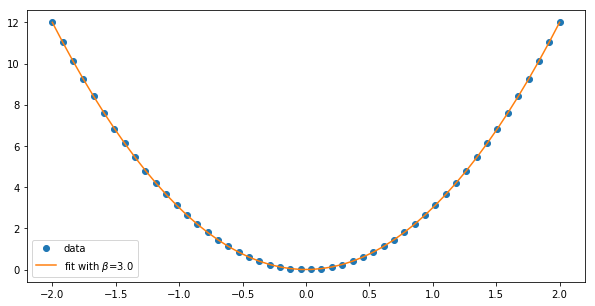

In [24]:
plt.figure(figsize=(10,5))
plt.plot(x,y, "o", label = "data")
plt.plot(x, X2(x,b), label = r"fit with $\beta$="+str(b))
plt.legend()
plt.show()


Lets's try our algorythm on a randomly distorted distribution.

In [25]:
x  = x
yN = y+(np.random.rand(y.shape[0])-0.5)*10.

In [26]:
bn = simple_fitting(x,yN)
print bn

test Bs:[  0.           0.1010101    0.2020202    0.3030303    0.4040404
   0.50505051   0.60606061   0.70707071   0.80808081   0.90909091
   1.01010101   1.11111111   1.21212121   1.31313131   1.41414141
   1.51515152   1.61616162   1.71717172   1.81818182   1.91919192
   2.02020202   2.12121212   2.22222222   2.32323232   2.42424242
   2.52525253   2.62626263   2.72727273   2.82828283   2.92929293
   3.03030303   3.13131313   3.23232323   3.33333333   3.43434343
   3.53535354   3.63636364   3.73737374   3.83838384   3.93939394
   4.04040404   4.14141414   4.24242424   4.34343434   4.44444444
   4.54545455   4.64646465   4.74747475   4.84848485   4.94949495
   5.05050505   5.15151515   5.25252525   5.35353535   5.45454545
   5.55555556   5.65656566   5.75757576   5.85858586   5.95959596
   6.06060606   6.16161616   6.26262626   6.36363636   6.46464646
   6.56565657   6.66666667   6.76767677   6.86868687   6.96969697
   7.07070707   7.17171717   7.27272727   7.37373737   7.47474747
   

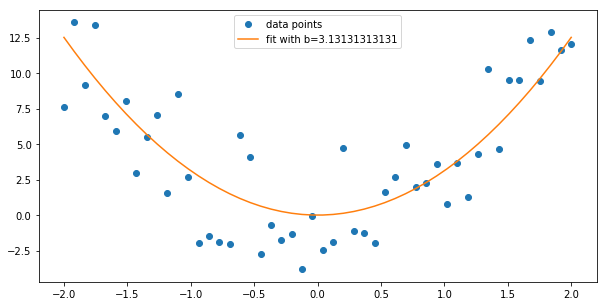

In [27]:
plt.figure(figsize=(10,5))
plt.plot(x, yN, "o", label = "data points")
plt.plot(x, X2(x,bn), "-", label = "fit with b="+str(bn))
plt.legend(loc = "upper center")
plt.show()

This works well for finding single integer parameters in a set of integer numbers.
But how about float number? We can use a larger parameter set to find as follows:

In [28]:
y = X2(x,3.333333)
bsmall = simple_fitting(x,y,start=0., end = 9., steps = 10)    ### fits from a set of 100 functions
blarge = simple_fitting(x,y,start=0., end = 9., steps = 10000)  ### fits from a set of 10000 functions
print b

test Bs:[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
test Bs:[  0.00000000e+00   9.00090009e-04   1.80018002e-03 ...,   8.99819982e+00
   8.99909991e+00   9.00000000e+00]
3.0


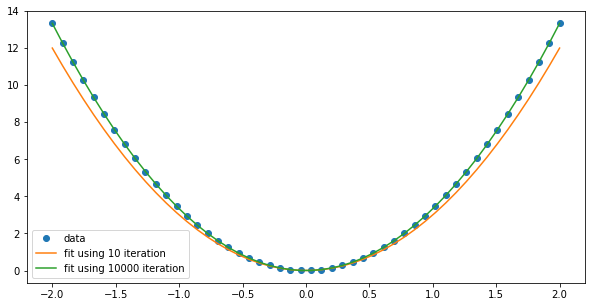

In [29]:
plt.figure(figsize=(10,5))
plt.plot(x,y, "o", label = "data")
plt.plot(x, X2(x,bsmall), label = r"fit using 10 iteration")
plt.plot(x, X2(x,blarge), label = r"fit using 10000 iteration")
plt.legend()
plt.show()

For our approach we require a sufficient iteration window also the accuracy is depending on the spacing of the $\beta$ distribution (presented in the last example). Also, we havent tested our fitting approach on multiple parameters. For multiplefitting parameters, our algorithm would not be able to process finding multiple local minimas. Therefore, we would need to enhence our algorithm by performing multiple fitting iterations with converging parameter windows and to improve the guess ($\beta$) of each solution with an estimation ($\delta$) and evaluate it with a cost function $J$. 

<h3 align="center"> $argmin_{\beta+\delta}[y - f(\beta) - J\delta]^2$ = 0 </h3> 

which could be solved with:

<h3 align="center"> $(J^TJ+\lambda diag(J^TJ) \delta = J^T[y-f(\beta)])$ </h3> 

Let's not do this now ....
Instead, let's use the curve_fit function provided by scipy's optimize module

## Scipy fitting

The following steps, discripe the procedure on how to find a set of fitting parameters using scipy's leastsq.

In [30]:
def XX2(x, a, b, c):
    y = a*x**2. + b*x + c
    return y

In [31]:
x = np.linspace(-2.,2.,100)
y = XX2(x, a = 2., b = 3., c= 1.)+(np.random.rand(100)-0.5)*10.

curve_fit

In [32]:
fitP, error = optimize.curve_fit(XX2, x, y, p0 = [2., 3., 1.])
print fitP

[ 2.01549431  3.30371852  1.13460175]


In [33]:
print fitP.shape, error.shape

(3,) (3, 3)


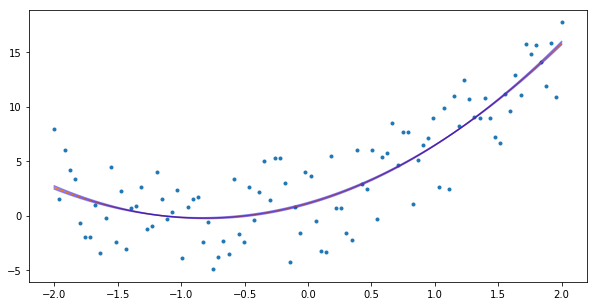

In [34]:
plt.figure(figsize=(10,5))
plt.plot(x,y, ".")
plt.plot(x,XX2(x, fitP[0], fitP[1], fitP[2]))
#### plotting the error
plt.plot(x,XX2(x,fitP[0]+error[0,0],fitP[1]+error[0,1],fitP[2]+error[0,2]), "-b", alpha = 0.5)
plt.plot(x,XX2(x,fitP[0]-error[0,0],fitP[1]-error[0,1],fitP[2]-error[0,2]), "-b", alpha = 0.5)

plt.show()

We will continue here next week ....